# Batch Size and Training Speed
* Relatioship between batch size and training speed
* Should batch size be a power of 2?

In [5]:
import os
import sys
import glob
import random
import pickle
import numpy as np
from PIL import Image
import time
import copy
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import transforms
import torch.nn.functional as F

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import display, HTML

%reload_ext autoreload
%autoreload 2
%matplotlib inline

%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

torch.cuda.set_device(0)
print(torch.cuda.current_device())
use_gpu = torch.cuda.is_available()

SEED = 101
np.random.seed(SEED)

DATA_FOLDER = '/media/rene/Data/data'

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0
0


## Simple CNN on CIFAIR
Based off https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py

In [2]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [3]:
def train_CIFAR10(net, DATA_FOLDER, batch_size, epochs = 5):
    
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        
    
    trainset = torchvision.datasets.CIFAR10(root=DATA_FOLDER, train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=4)

    testset = torchvision.datasets.CIFAR10(root=DATA_FOLDER, train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=4)


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    
    for epoch in range(epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # wrap them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.data[0]

In [ ]:
batch_sizes = list(range(1, 24))
print(len(batch_sizes))
times = []

for batch_size in tqdm(batch_sizes):
    net = Net()
    
    t0 = time.time()
    train_CIFAR10(net, DATA_FOLDER, batch_size, epochs = 5)
    t1 = time.time()

    total = t1-t0
    times.append(total)
    print(f'Batch size : {batch_size}, time: {total}')
    
plt.plot(batch_sizes, times)
plt.show()

outfile = '/media/rene/Data/camelyon_out/batch_test/batch_sizes.npy'
np.save(outfile, batch_sizes)

outfile = '/media/rene/Data/camelyon_out/batch_test/times.npy'
np.save(outfile, times)

  0%|          | 0/23 [00:00<?, ?it/s]

23
Files already downloaded and verified
Files already downloaded and verified


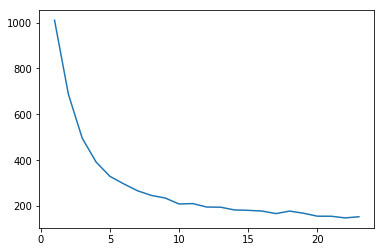

In [7]:
batch_sizes = np.load('/media/rene/Data/camelyon_out/batch_test/batch_sizes.npy')
times = np.load('/media/rene/Data/camelyon_out/batch_test/times.npy')

plt.plot(batch_sizes, times)
plt.show()